#### Day 13 Exercise

### Exercise Problem Statement  
Part A: Multiprocessing Sensitivity Analysis

Consider the LP:

Objective: Minimize f(x,y) = -3x - 5y  
(i.e., maximize 3x + 5y)  
Constraints:  
2x + 3y ≤ b1  
x + 2y ≤ b2  
x, y ≥ 0  

In [77]:
from scipy.optimize import linprog
from pathos.multiprocessing import ProcessingPool as Pool  # Use pathos' Pool
import numpy as np

In [78]:
def solve_lp(b):

    c = [-3, -5]
    A = [
        [2,3],
        [1,2]
    ]
    # b = [b1, b2]
    bounds = [(0, None), (0, None)]

    result = linprog(
        c = c,
        A_ub = A,
        b_ub = b,
        bounds = bounds,
        method="highs"
    )

    return (b, result.fun)



In [79]:
b1_range = np.arange(0,30,1)
b2_range = np.arange(0,30,1)

rhs_list = [(b1,b2) for b1 in b1_range for b2 in b2_range]
print(len(rhs_list))

with Pool() as pool:
    results = pool.map(solve_lp, rhs_list)


900


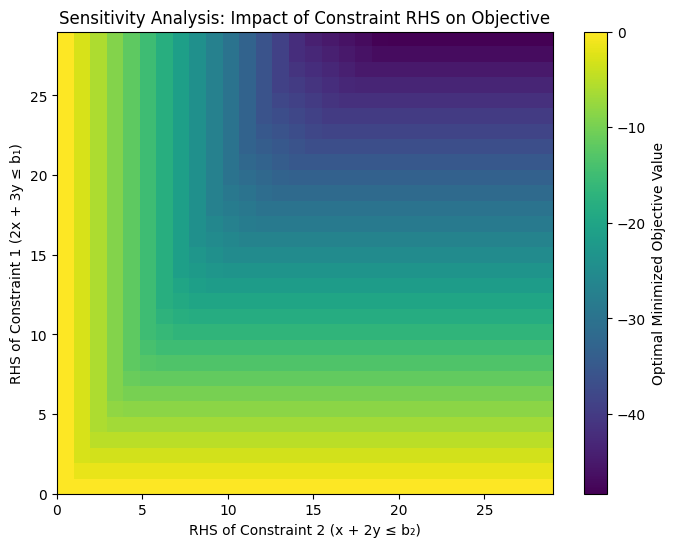

In [80]:
# Visualize the problem

import matplotlib.pyplot as plt

# Reshape the results into a grid for plotting.
# The grid shape is (len(b1_range), len(b2_range))
objective_grid = np.zeros((len(b1_range), len(b2_range)))
for r in results:
    b, obj = r
    i = int(b[0] - b1_range[0])  # index based on b1_range
    j = int(b[1] - b2_range[0])  # index based on b2_range
    objective_grid[i, j] = obj

# Create the heatmap.
plt.figure(figsize=(8, 6))
extent = [b2_range[0], b2_range[-1], b1_range[0], b1_range[-1]]
im = plt.imshow(objective_grid, origin='lower', extent=extent, aspect='auto', cmap='viridis')
plt.colorbar(im, label='Optimal Minimized Objective Value')
plt.xlabel('RHS of Constraint 2 (x + 2y ≤ b₂)')
plt.ylabel('RHS of Constraint 1 (2x + 3y ≤ b₁)')
plt.title('Sensitivity Analysis: Impact of Constraint RHS on Objective')
plt.show()